#**Getting familiar with the dataset**

## **Question 1**




In [ ]:
import pandas as pd

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Project1-Classification.csv to Project1-Classification.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Project1-Classification.csv']))

In [ ]:
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


In [ ]:
df.shape

(3150, 8)

In [ ]:
df.dtypes

full_text       object
summary         object
keywords        object
publish_date    object
authors         object
url             object
leaf_label      object
root_label      object
dtype: object

**Histogram (a)**

Text(0.5, 1.0, '(a) Histogram of total characters per sample in full_text')

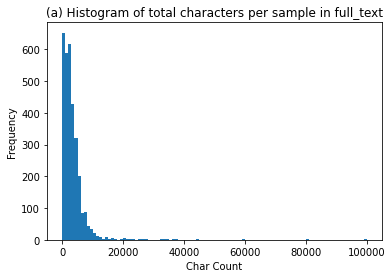

In [ ]:
# Histograms
import matplotlib.pyplot as plt

## (a) total number of alpha-numeric characters per data point (row) in the feature full_text

charCount = df["full_text"].str.len() # charCount[i] is the number of alpha-numeric characters in the ith row

plt.hist(charCount, bins=100)
plt.xlabel("Char Count")
plt.ylabel("Frequency")
plt.title ("(a) Histogram of total characters per sample in full_text")


**Histogram (b)**

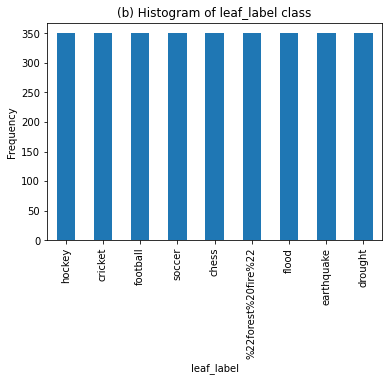

In [ ]:
## (b) the column leaf_label - class on the x-axis
leafCount = df["leaf_label"].value_counts().plot(kind='bar')
plt.xlabel("leaf_label")
plt.ylabel("Frequency")
plt.title ("(b) Histogram of leaf_label class")
plt.show()

**Histogram (c)**

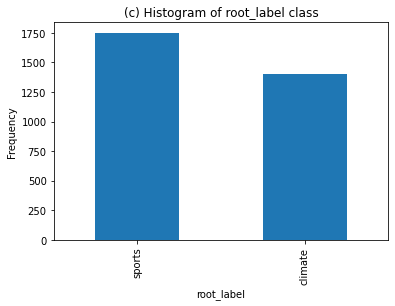

In [ ]:
## (c) the column root_label - class on the x-axis
rootCount = df["root_label"].value_counts().plot(kind='bar')
plt.xlabel("root_label")
plt.ylabel("Frequency")
plt.title ("(c) Histogram of root_label class")
plt.show()

# **Binary Classification**

In [ ]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

## (1) Split the entire dataset into training and testing data

### **Question 2**

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

In [ ]:
print(train.shape)
print(test.shape)

(2520, 2)
(630, 2)


## (2) Feature Extraction

### **Question 3**


Clean data sample to remove HTML Artefacts

In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub('\n\n', " ", texter) # added
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [ ]:
# Clean the full_text of train and test set
def cleanDF(row):
  return clean(row['full_text'])

train['full_text'] = train.apply(cleanDF, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(cleanDF, axis=1) 

Perform lemmatization with part of speech tag

In [ ]:
print(train)

                                              full_text root_label
2310  'As of Sunday night, a lopsided area of low pr...    climate
2189  'The U.N. childrens agency says some 2 million...    climate
2304  'Wicked winds and heavy rains battered the sta...    climate
2988  'I live in a community with a homeowners assoc...    climate
221   'The Special Olympics team took home the hard ...     sports
...                                                 ...        ...
3092  'Some Coachella Valley homeowners and communit...    climate
1095  'About Photo #4851709: Gerard Pique retired fr...     sports
1130  'How much of your donated clothing finds a new...     sports
1294  'The Tennessee State football team fell out of...     sports
860   'Wilmington StarNews This feature is sponsored...     sports

[2520 rows x 2 columns]


In [ ]:
# perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
  # min_df = 3
  # exclude terms that are numbers
  # use english stopwords of CountVectorizer
  # CountVectorizer, TfidfTransformer, About Lemmatization, Pipeline (maybe)

# (1) use nltk tokenizer, (2) join(lemmatized full text example) (3) count vectorizer (4) TF-IDF

## lemmatization

import nltk
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import wordnet

def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

def remove_numbers(text):
  return re.sub(r'[0-9]', '', text)


lemmatizer = WordNetLemmatizer()

# POS tagger function
def pos_tagger(nltk_tag):
  if nltk_tag.startswith('J'):
      return wordnet.ADJ
  elif nltk_tag.startswith('V'):
      return wordnet.VERB
  elif nltk_tag.startswith('N'):
      return wordnet.NOUN
  elif nltk_tag.startswith('R'):
      return wordnet.ADV
  else:         
      return None

def doLemmatization(row):
  row['full_text'] = remove_numbers(row['full_text']) # remove numbers
  row['full_text'] = remove_punctuation(row['full_text']) # remove punctuation
  token = nltk.word_tokenize(row['full_text']) # tokenize the text

  pos_tagged = nltk.pos_tag(token)
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
      if tag is None:
          # if there is no available tag, append the token as is
          lemmatized_sentence.append(word)
      else:       
          # else use the tag to lemmatize the token
          lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    
  lemmatized_sentence = " ".join(lemmatized_sentence)

  return lemmatized_sentence

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
train['full_text'] = train.apply(doLemmatization, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(doLemmatization, axis=1) 

In [ ]:
print(train)

                                              full_text root_label
2310  As of Sunday night a lopsided area of low pres...    climate
2189  The UN childrens agency say some million child...    climate
2304  Wicked wind and heavy rain batter the state of...    climate
2988  I live in a community with a homeowner associa...    climate
221   The Special Olympics team take home the hard f...     sports
...                                                 ...        ...
3092  Some Coachella Valley homeowner and community ...    climate
1095  About Photo Gerard Pique retire from soccer th...     sports
1130  How much of your donate clothing find a new ho...     sports
1294  The Tennessee State football team fell out of ...     sports
860   Wilmington StarNews This feature be sponsor by...     sports

[2520 rows x 2 columns]


In [ ]:
## count vectorizer  (and remove stop words)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',min_df=3) # min doc frequency

M_train = vectorizer.fit_transform(train['full_text'])
M_test = vectorizer.transform(test['full_text']) # only use transform on the testing set

In [ ]:
M_train.shape

(2520, 15076)

In [ ]:
M_test.shape

(630, 15076)

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer = TfidfTransformer()
M_train_tfid = tfid_transformer.fit_transform(M_train)

M_test_tfid = tfid_transformer.transform(M_test) # make sure to only use transform on testing sets

In [ ]:
M_train_tfid.shape

(2520, 15076)

In [ ]:
M_test_tfid.shape

(630, 15076)

## (3) Dimentionality Reduction

###**Question 4**

**LSI**

In [ ]:
from sklearn.decomposition import TruncatedSVD

k = [1, 10, 50, 100, 200, 500, 1000, 2000]
explainedVariance = np.zeros(8)

i = 0
for numComponents in k:
  lsi = TruncatedSVD(n_components=numComponents)
  lsi.fit_transform(M_train_tfid) 
  explainedVariance[i] = lsi.explained_variance_ratio_.sum()
  print("Explained Variance of k=" + str(numComponents) +": "+str(explainedVariance[i]))
  i = i+1
  
# Explained variance summation (ideally have around 80% explained variance to prevent overfitting)


Explained Variance of k=1: 0.00640761806750981
Explained Variance of k=10: 0.15315942197494078
Explained Variance of k=50: 0.30810220121953374
Explained Variance of k=100: 0.39520453275894474
Explained Variance of k=200: 0.5051372619762234
Explained Variance of k=500: 0.6984969727830819
Explained Variance of k=1000: 0.8732639146775447
Explained Variance of k=2000: 0.9999917055869025


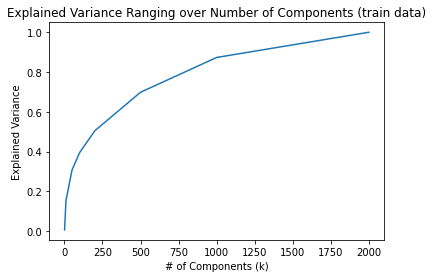

In [ ]:
plt.plot(k,explainedVariance)
plt.xlabel("# of Components (k)")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ranging over Number of Components (train data)")
plt.show()

In [ ]:
LSI = TruncatedSVD(n_components=50)
M_train_LSI = LSI.fit_transform(M_train_tfid) #UE
V = LSI.components_
M_train_est_LSI = np.matmul(M_train_LSI,V)

M_test_LSI = LSI.transform(M_test_tfid)
M_test_est_LSI = np.matmul(M_test_LSI,V)

**NMF**

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50)

# train
M_train_NMF = nmf.fit_transform(M_train_tfid) #W
H = nmf.components_
M_train_est_NMF = np.matmul(M_train_NMF,H) #WH

# test
M_test_NMF = nmf.transform(M_test_tfid)
M_test_est_NMF = np.matmul(M_test_NMF,H)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [ ]:
## Calculate residual MSE error (k=50)
from numpy import linalg 


#LSI

diffTrainLSI = M_train_tfid - M_train_est_LSI
mseTrainLSI = (linalg.norm(diffTrainLSI, 'fro'))**2

diffTestLSI = M_test_tfid - M_test_est_LSI
mseTestLSI = (linalg.norm(diffTestLSI, 'fro'))**2


#NMF

diffTrainNMF = M_train_tfid - M_train_est_NMF
mseTrainNMF = (linalg.norm(diffTrainNMF, 'fro'))**2

diffTestNMF = M_test_tfid - M_test_est_NMF
mseTestNMF = (linalg.norm(diffTestNMF, 'fro'))**2

#X-WH


In [ ]:
print("MSE Train LSI: " +str(mseTrainLSI))
print("MSE Test LSI: " +str(mseTestLSI))

print("\nMSE Train NMF: " + str(mseTrainNMF))
print("MSE Test NMF: " + str(mseTestNMF))

MSE Train LSI: 1689.171182091056
MSE Test LSI: 448.86362427760366

MSE Train NMF: 1713.2252151737266
MSE Test NMF: 454.71026574862634


## Support Vector Machine (SVM)

### **Question 5**

In [ ]:
LSI = TruncatedSVD(n_components=750) # chose k, I choose a k that provides around 80% of the variance to prevent overfitting
M_train = LSI.fit_transform(M_train_tfid) # LSI with k=750
M_test = LSI.transform(M_test_tfid)
print(LSI.explained_variance_ratio_.sum())

Y_train = train["root_label"]
Y_test = test["root_label"]

0.7996507863930159


SVM #1: Hard Margin, γ=1000

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

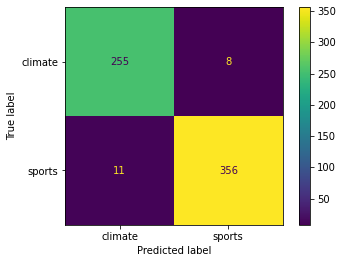

              precision    recall  f1-score   support

     climate       0.96      0.97      0.96       263
      sports       0.98      0.97      0.97       367

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


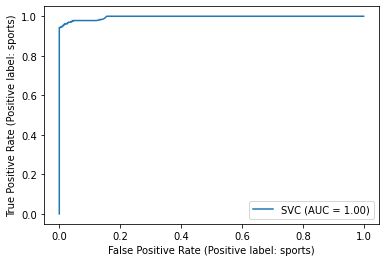

In [ ]:
# C = 1000
hardMargin = svm.SVC(kernel='linear', C=1000)
hardMargin.fit(M_train, Y_train)
Y_pred = hardMargin.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=hardMargin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hardMargin.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(hardMargin, M_test, Y_test)
plt.show()


SVM #2: Soft Margin, γ=0.0001

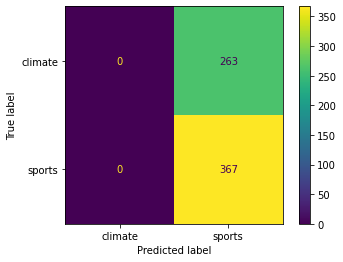

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

     climate       0.00      0.00      0.00       263
      sports       0.58      1.00      0.74       367

    accuracy                           0.58       630
   macro avg       0.29      0.50      0.37       630
weighted avg       0.34      0.58      0.43       630



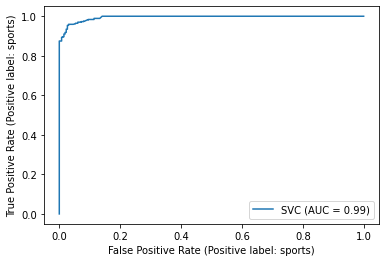

In [ ]:
# C = 0.0001
softMargin = svm.SVC(kernel='linear', C=0.0001)
softMargin.fit(M_train, Y_train)
Y_pred = softMargin.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=softMargin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=softMargin.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(softMargin, M_test, Y_test)
plt.show()


SVM #3: Very Hard Margin, γ=100,000

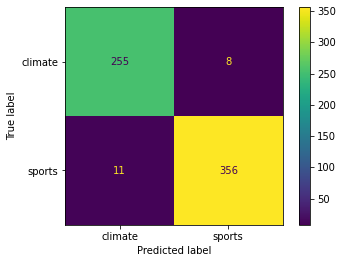

              precision    recall  f1-score   support

     climate       0.96      0.97      0.96       263
      sports       0.98      0.97      0.97       367

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


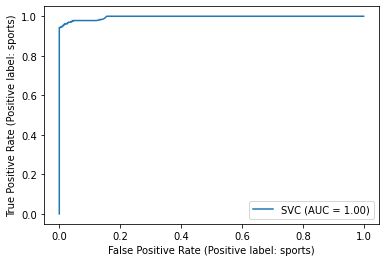

In [ ]:
# C = 1000
hardMargin2 = svm.SVC(kernel='linear', C=100000)
hardMargin2.fit(M_train, Y_train)
Y_pred = hardMargin2.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=hardMargin2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hardMargin2.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(hardMargin2, M_test, Y_test)
plt.show()


Cross-validation to choose γ

In [ ]:
# 5-fold cross validation {10^k| -3<=k<=6, k in Z}
# perform on TRAINING data, not test set
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable

gamma = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 500, 1000, 10000, 100000, 1000000]

hyperparameter_score_list = []
for k in gamma: 
  print(k)
  cf = svm.SVC(kernel='linear', C=k)
  scores = cross_validate(cf, M_train, Y_train, cv=5, scoring='accuracy')
  average_score = np.mean(scores['test_score'])
  hyperparameter_score_list.append([k, average_score])

paramTable = PrettyTable(["gamma", "average accuracy"])
for row in hyperparameter_score_list:
  paramTable.add_row([row[0], row[1]])
print (paramTable)

0.001
0.005
0.01
0.05
0.1
0.5
1
10
100
500
1000
10000
100000
1000000
+---------+--------------------+
|  gamma  |  average accuracy  |
+---------+--------------------+
|  0.001  | 0.5488095238095239 |
|  0.005  | 0.5488095238095239 |
|   0.01  | 0.5492063492063493 |
|   0.05  | 0.9257936507936508 |
|   0.1   | 0.9436507936507936 |
|   0.5   | 0.9555555555555555 |
|    1    | 0.9551587301587301 |
|    10   | 0.9488095238095238 |
|   100   | 0.9468253968253968 |
|   500   | 0.9468253968253968 |
|   1000  | 0.9468253968253968 |
|  10000  | 0.9468253968253968 |
|  100000 | 0.9468253968253968 |
| 1000000 | 0.9468253968253968 |
+---------+--------------------+


SVM #4, Cross-validated parameter, γ=0.5

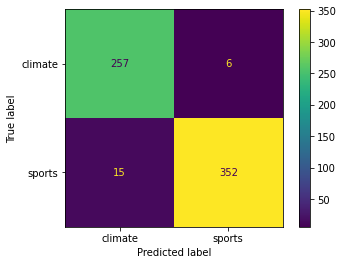

              precision    recall  f1-score   support

     climate       0.94      0.98      0.96       263
      sports       0.98      0.96      0.97       367

    accuracy                           0.97       630
   macro avg       0.96      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


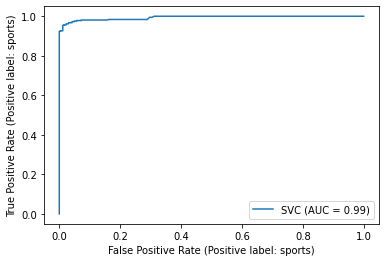

In [ ]:
# C = 0.5
clf = svm.SVC(kernel='linear', C=0.5)
clf.fit(M_train, Y_train)
Y_pred = clf.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(clf, M_test, Y_test)
plt.show()


## Logistic Regression

### **Question 6**

Logistic Classification without Regularization

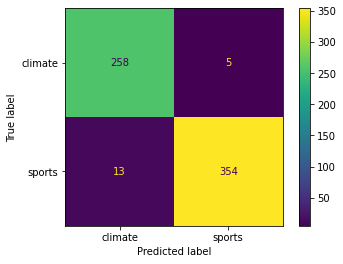

              precision    recall  f1-score   support

     climate       0.95      0.98      0.97       263
      sports       0.99      0.96      0.98       367

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


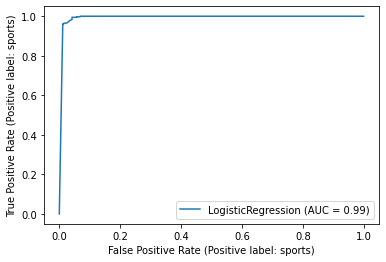

In [ ]:
from sklearn.linear_model import LogisticRegression

logNoReg = LogisticRegression(penalty = 'none')
logNoReg.fit(M_train, Y_train)
Y_pred = logNoReg.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=logNoReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logNoReg.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(logNoReg, M_test, Y_test)
plt.show()

5-fold cross validation L1 regularization

In [ ]:
# 5-fold cross validation {10^k| -5<=k<=5, k in Z}
# perform on TRAINING data, not test set

regularization = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

hyperparameter_score_list = []
for strength in regularization: 
  print(strength)
  cf = LogisticRegression(penalty = 'l1', solver='liblinear', C=strength) #C is inverse to regularization strength
  scores = cross_validate(cf, M_train, Y_train, cv=5, scoring='accuracy')
  average_score = np.mean(scores['test_score'])
  hyperparameter_score_list.append([strength, average_score])

paramTable = PrettyTable(["Regularization Strength", "average accuracy"])
for row in hyperparameter_score_list:
  paramTable.add_row([row[0], row[1]])
print (paramTable)

1e-05
0.0001
0.001
0.01
0.1
1
10
100
1000
10000
100000
+-------------------------+--------------------+
| Regularization Strength |  average accuracy  |
+-------------------------+--------------------+
|          1e-05          | 0.4511904761904762 |
|          0.0001         | 0.4511904761904762 |
|          0.001          | 0.4511904761904762 |
|           0.01          | 0.4511904761904762 |
|           0.1           | 0.926984126984127  |
|            1            |        0.95        |
|            10           | 0.9579365079365079 |
|           100           | 0.955952380952381  |
|           1000          | 0.9547619047619047 |
|          10000          | 0.9436507936507936 |
|          100000         | 0.9198412698412699 |
+-------------------------+--------------------+


5-fold cross validation L2 regularization

In [ ]:
# 5-fold cross validation {10^k| -5<=k<=5, k in Z}
# perform on TRAINING data, not test set

regularization = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

hyperparameter_score_list = []
for strength in regularization: 
  print(strength)
  cf = LogisticRegression(penalty = 'l2', C=strength, max_iter=100) #C is inverse to regularization strength
  scores = cross_validate(cf, M_train, Y_train, cv=5, scoring='accuracy')
  average_score = np.mean(scores['test_score'])
  hyperparameter_score_list.append([strength, average_score])

paramTable = PrettyTable(["Regularization Strength", "average accuracy"])
for row in hyperparameter_score_list:
  paramTable.add_row([row[0], row[1]])
print (paramTable)

1e-05
0.0001
0.001
0.01
0.1
1
10
100


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

1000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

10000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

100000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

+-------------------------+--------------------+
| Regularization Strength |  average accuracy  |
+-------------------------+--------------------+
|          1e-05          | 0.5488095238095239 |
|          0.0001         | 0.5488095238095239 |
|          0.001          | 0.5488095238095239 |
|           0.01          | 0.6611111111111111 |
|           0.1           | 0.9250000000000002 |
|            1            | 0.9547619047619047 |
|            10           | 0.9595238095238094 |
|           100           | 0.9563492063492063 |
|           1000          | 0.9527777777777778 |
|          10000          | 0.9559523809523809 |
|          100000         | 0.9583333333333333 |
+-------------------------+--------------------+


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


L1 w/ CV Parameters (C=10)

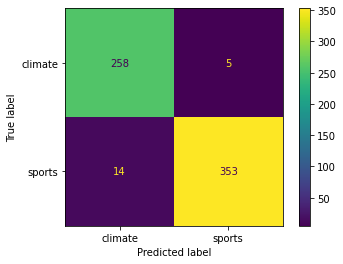

              precision    recall  f1-score   support

     climate       0.95      0.98      0.96       263
      sports       0.99      0.96      0.97       367

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


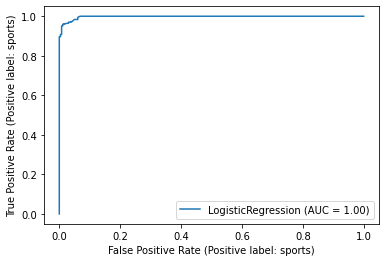

In [ ]:
logL1 = LogisticRegression(penalty = 'l1', solver='liblinear', C=10)
logL1.fit(M_train, Y_train)
Y_pred = logL1.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=logL1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logL1.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(logL1, M_test, Y_test)
plt.show()

L2 w/ CV Parameters (C=10)

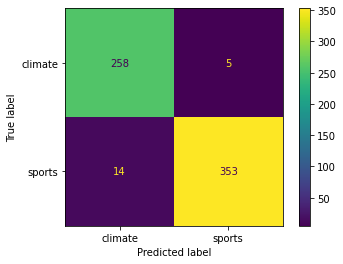

              precision    recall  f1-score   support

     climate       0.95      0.98      0.96       263
      sports       0.99      0.96      0.97       367

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


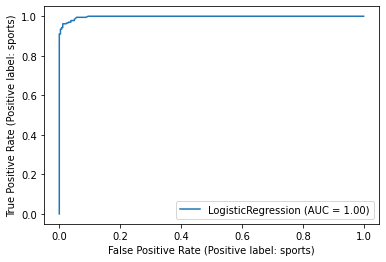

In [ ]:
logL2 = LogisticRegression(penalty = 'l2', C=10)
logL2.fit(M_train, Y_train)
Y_pred = logL2.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=logL2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logL2.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(logL2, M_test, Y_test)
plt.show()

## Naive Bayes Model

### **Question 7**

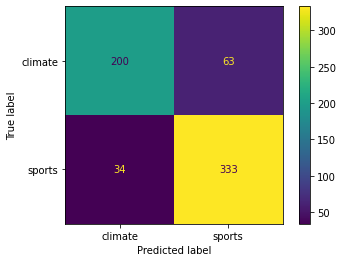

              precision    recall  f1-score   support

     climate       0.85      0.76      0.80       263
      sports       0.84      0.91      0.87       367

    accuracy                           0.85       630
   macro avg       0.85      0.83      0.84       630
weighted avg       0.85      0.85      0.84       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


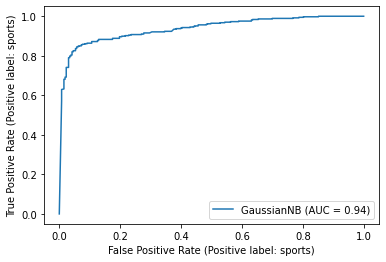

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(M_train, Y_train)
Y_pred = NB.predict(M_test)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(NB, M_test, Y_test)
plt.show()

## Grid Search of Parameters

### **Question 8**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Lemmatization Pipeline

In [ ]:
## LEMMATIZATION COMPRESSION

# train-test split 
train,test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

# (1) clean data 
train['full_text'] = train.apply(cleanDF, axis=1) # axis=1 iterates row by row

# (2a) perform lematization
train['full_text'] = train.apply(doLemmatization, axis=1) # axis=1 iterates row by row

# (3) pipeline


In [ ]:
# (3) pipeline for lemmatization

#1, 2 (these don't have fit and transform) pipeline: 3, 4, 5, 6 (these all have fit and transform)
# all steps of the pipeline must be 'transforms', i.e. implement fit and transform methods
# [A] (1) clean, (2) lemmatize, (3) pipeline...
# [B] (1) clean, (2) stem, (3) pipeline...

pipeline = Pipeline([
    ('vectorize', CountVectorizer(stop_words='english')),
    ('featureExtraction', TfidfTransformer()),
    ('dimensionalityReduction', None),
    ('models', None)
])

param_grid = {
    'vectorize__min_df': (3,5),
    'dimensionalityReduction': (TruncatedSVD(n_components=5), TruncatedSVD(n_components=30), TruncatedSVD(n_components=80),
                                NMF(n_components=5), NMF(n_components=30), NMF(n_components=80)),
    'models': (SVC(C=0.5),
               LogisticRegression(C=10, solver='liblinear', penalty='l1'), LogisticRegression(C=10, penalty='l2'),
               GaussianNB())
}

In [ ]:
gridLem = GridSearchCV(pipeline,param_grid=param_grid,cv=5,scoring='accuracy', verbose=10)
gridLem.fit(train['full_text'], train['root_label'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 1/5; 1/48] END dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.927 total time=   1.2s
[CV 2/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 2/5; 1/48] END dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.931 total time=   1.1s
[CV 3/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 3/5; 1/48] END dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.937 total time=   1.1s
[CV 4/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 4/5; 1/48] END dimensionalityReduction=Trun

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.921 total time=   1.6s
[CV 2/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.917 total time=   1.6s
[CV 3/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.935 total time=   1.5s
[CV 4/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.937 total time=   1.5s
[CV 5/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.911 total time=   1.5s
[CV 1/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.925 total time=   1.6s
[CV 2/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.921 total time=   1.5s
[CV 3/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.923 total time=   1.5s
[CV 4/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.931 total time=   1.4s
[CV 5/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.909 total time=   1.4s
[CV 1/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.921 total time=   1.5s
[CV 2/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.927 total time=   1.5s
[CV 3/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.937 total time=   1.5s
[CV 4/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.933 total time=   1.4s
[CV 5/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.921 total time=   1.4s
[CV 1/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.923 total time=   1.5s
[CV 2/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.925 total time=   1.4s
[CV 3/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.927 total time=   1.6s
[CV 4/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.933 total time=   1.4s
[CV 5/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.913 total time=   1.4s
[CV 1/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.913 total time=   1.5s
[CV 2/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.913 total time=   1.5s
[CV 3/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.919 total time=   1.5s
[CV 4/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.915 total time=   1.5s
[CV 5/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.905 total time=   1.5s
[CV 1/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.917 total time=   1.5s
[CV 2/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.883 total time=   1.4s
[CV 3/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.903 total time=   1.5s
[CV 4/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.927 total time=   1.4s
[CV 5/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.911 total time=   1.4s
[CV 1/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.919 total time=   1.5s
[CV 2/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.861 total time=   1.5s
[CV 3/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.867 total time=   1.5s
[CV 4/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.847 total time=   1.4s
[CV 5/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.849 total time=   1.4s
[CV 1/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.919 total time=   1.5s
[CV 2/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.833 total time=   1.3s
[CV 3/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.891 total time=   1.5s
[CV 4/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.865 total time=   1.4s
[CV 5/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.863 total time=   1.4s
[CV 1/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.946 total time=   3.1s
[CV 2/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.948 total time=   6.8s
[CV 3/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.960 total time=   3.4s
[CV 4/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.952 total time=   4.6s
[CV 5/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.917 total time=   4.7s
[CV 1/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.946 total time=   3.3s
[CV 2/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.952 total time=   3.5s
[CV 3/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.958 total time=   3.5s
[CV 4/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.946 total time=   5.8s
[CV 5/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.921 total time=   3.4s
[CV 1/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.950 total time=   3.8s
[CV 2/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.952 total time=   5.7s
[CV 3/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.964 total time=   4.4s
[CV 4/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.952 total time=   6.9s
[CV 5/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.929 total time=   5.1s
[CV 1/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.950 total time=   3.3s
[CV 2/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.954 total time=   6.9s
[CV 3/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.964 total time=   5.7s
[CV 4/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.950 total time=   6.1s
[CV 5/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.925 total time=   4.0s
[CV 1/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.952 total time=   3.0s
[CV 2/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.944 total time=   4.2s
[CV 3/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.946 total time=   3.7s
[CV 4/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.944 total time=   4.2s
[CV 5/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.913 total time=   6.0s
[CV 1/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.952 total time=   3.0s
[CV 2/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.956 total time=   6.9s
[CV 3/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.956 total time=   2.9s
[CV 4/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.940 total time=   6.9s
[CV 5/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.921 total time=   3.1s
[CV 1/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.948 total time=   3.4s
[CV 2/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.962 total time=   5.4s
[CV 3/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.966 total time=   3.3s
[CV 4/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.950 total time=   4.0s
[CV 5/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.933 total time=   4.3s
[CV 1/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.950 total time=   3.5s
[CV 2/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.958 total time=   2.8s
[CV 3/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.962 total time=   2.8s
[CV 4/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.954 total time=   5.5s
[CV 5/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.931 total time=   4.7s
[CV 1/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.958 total time=  18.5s
[CV 2/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.944 total time=  28.9s
[CV 3/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.958 total time=  40.9s
[CV 4/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.946 total time=  22.8s
[CV 5/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.927 total time=  25.5s
[CV 1/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.950 total time=  19.8s
[CV 2/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.954 total time=  22.7s
[CV 3/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.964 total time=  25.9s
[CV 4/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.942 total time=  19.4s
[CV 5/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.927 total time=  18.9s
[CV 1/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.956 total time=  21.1s
[CV 2/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.960 total time=  32.7s
[CV 3/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.968 total time=  22.0s
[CV 4/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.948 total time=  26.4s
[CV 5/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.937 total time=  35.0s
[CV 1/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.962 total time=  14.1s
[CV 2/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.958 total time=  15.3s
[CV 3/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.964 total time=  21.9s
[CV 4/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.954 total time=  20.8s
[CV 5/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.944 total time=  14.5s
[CV 1/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.944 total time=  36.8s
[CV 2/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.944 total time=  27.6s
[CV 3/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.966 total time=  42.3s
[CV 4/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.938 total time=  27.6s
[CV 5/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.915 total time=  19.8s
[CV 1/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.952 total time=  16.1s
[CV 2/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.942 total time=  12.1s
[CV 3/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.960 total time=  29.0s
[CV 4/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.942 total time=  21.0s
[CV 5/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.917 total time=  16.1s
[CV 1/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.960 total time=  20.5s
[CV 2/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.958 total time=  17.6s
[CV 3/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.966 total time=  23.0s
[CV 4/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.942 total time=  35.9s
[CV 5/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.935 total time=  33.3s
[CV 1/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.958 total time=  19.5s
[CV 2/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.958 total time=  12.0s
[CV 3/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.966 total time=  28.7s
[CV 4/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.942 total time=  25.2s
[CV 5/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.937 total time=  13.9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words='english')),
                                       ('featureExtraction',
                                        TfidfTransformer()),
                                       ('dimensionalityReduction', None),
                                       ('models', None)]),
             param_grid={'dimensionalityReduction': (TruncatedSVD(n_components=5),
                                                     TruncatedSVD(n_components=30),
                                                     TruncatedSVD(n_components=80),
                                                     NMF(n_components=5),
                                                     NMF(n_components=30),
                                                     NMF(n_components=80)),
                         'models': (SVC(C=0.5),
                                    LogisticRegression(C=10, penalty=

In [ ]:
resultsLem = pd.DataFrame(gridLem.cv_results_)[['mean_test_score',
 'params',
 'rank_test_score',
 ]]

resultsLem.sort_values('rank_test_score')

,mean_test_score,params,rank_test_score
21,0.956746,{'dimensionalityReduction': TruncatedSVD(n_com...,1
43,0.956746,{'dimensionalityReduction': NMF(n_components=8...,1
19,0.956746,{'dimensionalityReduction': TruncatedSVD(n_com...,1
18,0.955556,{'dimensionalityReduction': TruncatedSVD(n_com...,4
20,0.955159,{'dimensionalityReduction': TruncatedSVD(n_com...,5
42,0.953968,{'dimensionalityReduction': NMF(n_components=8...,6
47,0.952381,{'dimensionalityReduction': NMF(n_components=8...,7
46,0.952381,{'dimensionalityReduction': NMF(n_components=8...,7
38,0.951984,{'dimensionalityReduction': NMF(n_components=3...,9
17,0.951587,{'dimensionalityReduction': TruncatedSVD(n_com...,10


Stemming Pipeline

In [ ]:
# stemming code
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def doStemming(row):
  row['full_text'] = remove_numbers(row['full_text']) # remove numbers
  row['full_text'] = remove_punctuation(row['full_text']) # remove punctuation

  token = nltk.word_tokenize(row['full_text']) # tokenize the text

  stemmed_sentence = []

  for word in token:
    stemmed_sentence.append(ps.stem(word))
  
  stemmed_sentence = " ".join(stemmed_sentence)

  return stemmed_sentence

In [ ]:
## STEMMING COMPRESSION

# train-test split 
train,test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

# (1) clean data 
train['full_text'] = train.apply(cleanDF, axis=1) # axis=1 iterates row by row

# (2b) perform stemming
train['full_text'] = train.apply(doStemming, axis=1) # axis=1 iterates row by row

# (3) pipeline


In [ ]:
# (3) pipeline for stemming

#1, 2 (these don't have fit and transform) pipeline: 3, 4, 5, 6 (these all have fit and transform)
# all steps of the pipeline must be 'transforms', i.e. implement fit and transform methods
# [A] (1) clean, (2) lemmatize, (3) pipeline...
# [B] (1) clean, (2) stem, (3) pipeline...

pipeline = Pipeline([
    ('vectorize', CountVectorizer(stop_words='english')),
    ('featureExtraction', TfidfTransformer()),
    ('dimensionalityReduction', None),
    ('models', None)
])

param_grid = {
    'vectorize__min_df': (3,5),
    'dimensionalityReduction': (TruncatedSVD(n_components=5), TruncatedSVD(n_components=30), TruncatedSVD(n_components=80),
                                NMF(n_components=5), NMF(n_components=30), NMF(n_components=80)),
    'models': (SVC(C=0.5),
               LogisticRegression(C=10, solver='liblinear', penalty='l1'), LogisticRegression(C=10, penalty='l2'),
               GaussianNB())
}

In [ ]:
gridStem = GridSearchCV(pipeline,param_grid=param_grid,cv=5,scoring='accuracy', verbose=10)
gridStem.fit(train['full_text'], train['root_label'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 1/5; 1/48] END dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.935 total time=   1.2s
[CV 2/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 2/5; 1/48] END dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.942 total time=   1.1s
[CV 3/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 3/5; 1/48] END dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.927 total time=   1.1s
[CV 4/5; 1/48] START dimensionalityReduction=TruncatedSVD(n_components=5), models=SVC(C=0.5), vectorize__min_df=3
[CV 4/5; 1/48] END dimensionalityReduction=Trun

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.927 total time=   1.6s
[CV 2/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.940 total time=   1.7s
[CV 3/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.917 total time=   1.5s
[CV 4/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.946 total time=   1.5s
[CV 5/5; 25/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 25/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=3;, score=0.917 total time=   1.6s
[CV 1/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.940 total time=   1.8s
[CV 2/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.946 total time=   1.5s
[CV 3/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.919 total time=   1.4s
[CV 4/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.942 total time=   1.4s
[CV 5/5; 26/48] START dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 26/48] END dimensionalityReduction=NMF(n_components=5), models=SVC(C=0.5), vectorize__min_df=5;, score=0.913 total time=   1.9s
[CV 1/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.929 total time=   1.5s
[CV 2/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.937 total time=   1.6s
[CV 3/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.921 total time=   1.5s
[CV 4/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.942 total time=   1.5s
[CV 5/5; 27/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 27/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.921 total time=   1.5s
[CV 1/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.940 total time=   1.7s
[CV 2/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.933 total time=   1.4s
[CV 3/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.921 total time=   1.4s
[CV 4/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.944 total time=   1.7s
[CV 5/5; 28/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 28/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.915 total time=   1.8s
[CV 1/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.925 total time=   1.5s
[CV 2/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.933 total time=   1.6s
[CV 3/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.923 total time=   1.5s
[CV 4/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.942 total time=   1.5s
[CV 5/5; 29/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 29/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.907 total time=   1.6s
[CV 1/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.933 total time=   1.7s
[CV 2/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.931 total time=   1.4s
[CV 3/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.921 total time=   1.4s
[CV 4/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.944 total time=   1.4s
[CV 5/5; 30/48] START dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 30/48] END dimensionalityReduction=NMF(n_components=5), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.911 total time=   1.8s
[CV 1/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.891 total time=   1.5s
[CV 2/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.917 total time=   1.7s
[CV 3/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.901 total time=   1.4s
[CV 4/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.935 total time=   2.5s
[CV 5/5; 31/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 31/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=3;, score=0.869 total time=   1.7s
[CV 1/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.938 total time=   1.7s
[CV 2/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.919 total time=   1.4s
[CV 3/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.907 total time=   1.3s
[CV 4/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.937 total time=   1.3s
[CV 5/5; 32/48] START dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 32/48] END dimensionalityReduction=NMF(n_components=5), models=GaussianNB(), vectorize__min_df=5;, score=0.883 total time=   1.8s
[CV 1/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.950 total time=   3.8s
[CV 2/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.942 total time=   3.5s
[CV 3/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.938 total time=   7.5s
[CV 4/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.966 total time=   4.3s
[CV 5/5; 33/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 33/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=3;, score=0.933 total time=   5.3s
[CV 1/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.964 total time=   5.9s
[CV 2/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.946 total time=   3.1s
[CV 3/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.942 total time=   6.3s
[CV 4/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.960 total time=   2.6s
[CV 5/5; 34/48] START dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 34/48] END dimensionalityReduction=NMF(n_components=30), models=SVC(C=0.5), vectorize__min_df=5;, score=0.931 total time=   2.9s
[CV 1/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.954 total time=   3.9s
[CV 2/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.942 total time=   3.8s
[CV 3/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.937 total time=   4.5s
[CV 4/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.962 total time=   3.8s
[CV 5/5; 35/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5; 35/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.938 total time=   7.5s
[CV 1/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.952 total time=   4.1s
[CV 2/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.948 total time=   3.9s
[CV 3/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.937 total time=   6.3s
[CV 4/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.968 total time=   3.4s
[CV 5/5; 36/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 36/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.942 total time=   2.7s
[CV 1/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.948 total time=   4.1s
[CV 2/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.946 total time=   4.1s
[CV 3/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.940 total time=   7.4s
[CV 4/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.962 total time=   4.4s
[CV 5/5; 37/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 37/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.929 total time=   4.7s
[CV 1/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.952 total time=   6.2s
[CV 2/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.946 total time=   3.2s
[CV 3/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.938 total time=   3.7s
[CV 4/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.958 total time=   4.7s
[CV 5/5; 38/48] START dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 38/48] END dimensionalityReduction=NMF(n_components=30), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.927 total time=   2.9s
[CV 1/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.954 total time=   5.8s
[CV 2/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.954 total time=   6.0s
[CV 3/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.929 total time=   8.4s
[CV 4/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.956 total time=   4.1s
[CV 5/5; 39/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 39/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=3;, score=0.952 total time=   6.5s
[CV 1/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.952 total time=   5.2s
[CV 2/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.946 total time=   5.5s
[CV 3/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.921 total time=   5.6s
[CV 4/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.956 total time=   2.7s
[CV 5/5; 40/48] START dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 40/48] END dimensionalityReduction=NMF(n_components=30), models=GaussianNB(), vectorize__min_df=5;, score=0.950 total time=   3.0s
[CV 1/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.952 total time=  24.6s
[CV 2/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.956 total time=  20.9s
[CV 3/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.950 total time=  19.8s
[CV 4/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.942 total time=  24.5s
[CV 5/5; 41/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5; 41/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=3;, score=0.946 total time=  34.4s
[CV 1/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.954 total time=  24.1s
[CV 2/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.952 total time=  19.0s
[CV 3/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.944 total time=  25.9s
[CV 4/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.944 total time=  17.0s
[CV 5/5; 42/48] START dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 42/48] END dimensionalityReduction=NMF(n_components=80), models=SVC(C=0.5), vectorize__min_df=5;, score=0.942 total time=  13.6s
[CV 1/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.964 total time=  31.2s
[CV 2/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.960 total time=  35.2s
[CV 3/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.950 total time=  22.2s
[CV 4/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.962 total time=  24.1s
[CV 5/5; 43/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 43/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=3;, score=0.960 total time=  30.5s
[CV 1/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.968 total time=  19.8s
[CV 2/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.958 total time=  21.0s
[CV 3/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.954 total time=  23.2s
[CV 4/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.966 total time=  25.1s
[CV 5/5; 44/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 44/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10, penalty='l1', solver='liblinear'), vectorize__min_df=5;, score=0.946 total time=  17.9s
[CV 1/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.938 total time=  26.4s
[CV 2/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.950 total time=  19.1s
[CV 3/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.927 total time=  20.4s
[CV 4/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.944 total time=  20.2s
[CV 5/5; 45/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 45/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=3;, score=0.927 total time=  32.8s
[CV 1/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.952 total time=  25.1s
[CV 2/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.956 total time=  19.5s
[CV 3/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.933 total time=  12.1s
[CV 4/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.946 total time=  18.5s
[CV 5/5; 46/48] START dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 46/48] END dimensionalityReduction=NMF(n_components=80), models=LogisticRegression(C=10), vectorize__min_df=5;, score=0.923 total time=  16.4s
[CV 1/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.968 total time=  33.6s
[CV 2/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.966 total time=  20.4s
[CV 3/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.937 total time=  31.4s
[CV 4/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 4/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.968 total time=  28.3s
[CV 5/5; 47/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 47/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=3;, score=0.940 total time=  26.4s
[CV 1/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 1/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.964 total time=  24.1s
[CV 2/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 2/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.960 total time=  11.6s
[CV 3/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 3/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.942 total time=  11.5s
[CV 4/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.968 total time=  25.3s
[CV 5/5; 48/48] START dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


[CV 5/5; 48/48] END dimensionalityReduction=NMF(n_components=80), models=GaussianNB(), vectorize__min_df=5;, score=0.944 total time=  16.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words='english')),
                                       ('featureExtraction',
                                        TfidfTransformer()),
                                       ('dimensionalityReduction', None),
                                       ('models', None)]),
             param_grid={'dimensionalityReduction': (TruncatedSVD(n_components=5),
                                                     TruncatedSVD(n_components=30),
                                                     TruncatedSVD(n_components=80),
                                                     NMF(n_components=5),
                                                     NMF(n_components=30),
                                                     NMF(n_components=80)),
                         'models': (SVC(C=0.5),
                                    LogisticRegression(C=10, penalty=

In [ ]:
resultsStem = pd.DataFrame(gridStem.cv_results_)[['mean_test_score',
 'params',
 'rank_test_score',
 ]]

resultsStem.sort_values('rank_test_score')

,mean_test_score,params,rank_test_score
19,0.962302,{'dimensionalityReduction': TruncatedSVD(n_com...,1
18,0.961905,{'dimensionalityReduction': TruncatedSVD(n_com...,2
17,0.960317,{'dimensionalityReduction': TruncatedSVD(n_com...,3
16,0.959524,{'dimensionalityReduction': TruncatedSVD(n_com...,4
42,0.959524,{'dimensionalityReduction': NMF(n_components=8...,4
20,0.959127,{'dimensionalityReduction': TruncatedSVD(n_com...,6
43,0.958730,{'dimensionalityReduction': NMF(n_components=8...,7
21,0.957540,{'dimensionalityReduction': TruncatedSVD(n_com...,8
47,0.955952,{'dimensionalityReduction': NMF(n_components=8...,9
46,0.955952,{'dimensionalityReduction': NMF(n_components=8...,9


# **Multiclass Classification**

## **Question 9**

In [ ]:
from sklearn.svm import SVC

In [ ]:
train, test = train_test_split(df[["full_text", "leaf_label"]], test_size=0.2)

In [ ]:
# mapping data to label
def label_data(x):
  label_map = {
      "chess":0,
      "cricket":1,
      "hockey":2,
      "soccer":3,
      "football":4,
      "%22forest%20fire%22":5, 
      "flood":6, 
      "earthquake":7,
      "drought":8
  }
  return label_map[x]

multi_train_labels = train.leaf_label.apply(label_data)
multi_test_labels = test.leaf_label.apply(label_data)

Preprocessing

In [ ]:
## cleaning
train['full_text'] = train.apply(doLemmatization, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(doLemmatization, axis=1) 

## count vectorizer  (and remove stop words)
vectorizer = CountVectorizer(stop_words='english',min_df=3) # min doc frequency

X_train = vectorizer.fit_transform(train['full_text'])
X_test = vectorizer.transform(test['full_text']) # only use transform on the testing set

## TF-IDF
tfid_transformer = TfidfTransformer()
X_train_tfid = tfid_transformer.fit_transform(X_train)
X_test_tfid = tfid_transformer.transform(X_test) # make sure to only use transform on testing sets

In [ ]:
## dimensionality reduction
LSI = TruncatedSVD(n_components=750) # chose k, I choose a k that provides around 80% of the variance to prevent overfitting
X_train = LSI.fit_transform(X_train_tfid) # LSI with k=750
X_test = LSI.transform(X_test_tfid)

Y_train = train["leaf_label"]
Y_test = test["leaf_label"]

In [ ]:
multi_train_labels

3115    8
199     2
2322    6
2359    6
1223    3
       ..
1501    0
1606    0
469     1
804     4
2656    7
Name: leaf_label, Length: 2520, dtype: int64

Naive Bayes

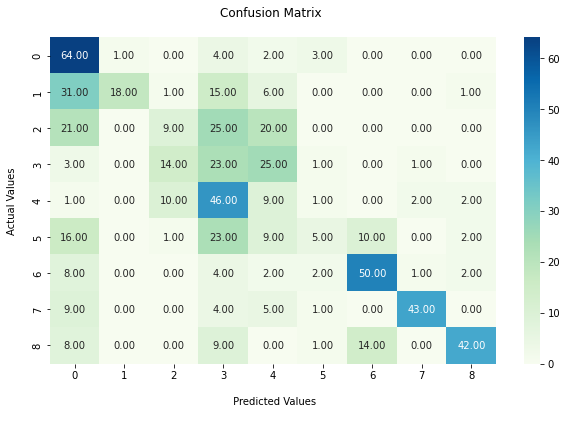

              precision    recall  f1-score   support

           0       0.40      0.86      0.54        74
           1       0.95      0.25      0.40        72
           2       0.26      0.12      0.16        75
           3       0.15      0.34      0.21        67
           4       0.12      0.13      0.12        71
           5       0.36      0.08      0.12        66
           6       0.68      0.72      0.70        69
           7       0.91      0.69      0.79        62
           8       0.86      0.57      0.68        74

    accuracy                           0.42       630
   macro avg       0.52      0.42      0.41       630
weighted avg       0.52      0.42      0.41       630



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

NB = GaussianNB()
NB.fit(X_train, multi_train_labels)
Y_pred = NB.predict(X_test)


# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=NB.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(NB.classes_)
fx.yaxis.set_ticklabels(NB.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

SVM (one vs. one)

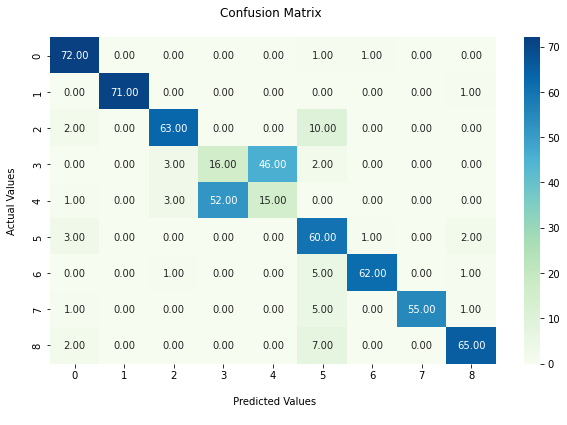

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        74
           1       1.00      0.99      0.99        72
           2       0.90      0.84      0.87        75
           3       0.24      0.24      0.24        67
           4       0.25      0.21      0.23        71
           5       0.67      0.91      0.77        66
           6       0.97      0.90      0.93        69
           7       1.00      0.89      0.94        62
           8       0.93      0.88      0.90        74

    accuracy                           0.76       630
   macro avg       0.76      0.76      0.76       630
weighted avg       0.76      0.76      0.76       630



In [ ]:
svmOVO = SVC(decision_function_shape='ovo')
svmOVO.fit(X_train,multi_train_labels)
Y_pred = svmOVO.predict(X_test)

# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=svmOVO.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(svmOVO.classes_)
fx.yaxis.set_ticklabels(svmOVO.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

SVM (one vs. rest) --> no class balance mitigation

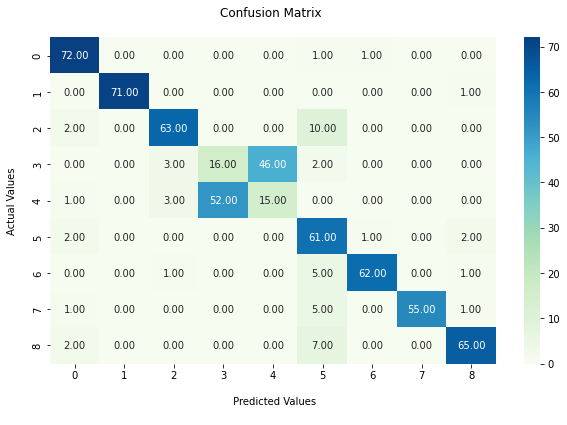

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        74
           1       1.00      0.99      0.99        72
           2       0.90      0.84      0.87        75
           3       0.24      0.24      0.24        67
           4       0.25      0.21      0.23        71
           5       0.67      0.92      0.78        66
           6       0.97      0.90      0.93        69
           7       1.00      0.89      0.94        62
           8       0.93      0.88      0.90        74

    accuracy                           0.76       630
   macro avg       0.76      0.76      0.76       630
weighted avg       0.76      0.76      0.76       630



In [ ]:
svmOVR = SVC(decision_function_shape='ovr', break_ties=True)
svmOVR.fit(X_train,multi_train_labels)
Y_pred = svmOVR.predict(X_test)

# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=svmOVR.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(svmOVR.classes_)
fx.yaxis.set_ticklabels(svmOVR.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

Merged Labels: One vs. One

In [ ]:
# mapping data to label
def label_data(x):
  label_map = {
      "chess":0,
      "cricket":1,
      "hockey":2,
      "soccer":3,
      "football":3,
      "%22forest%20fire%22":4, 
      "flood":5, 
      "earthquake":6,
      "drought":7
  }
  return label_map[x]

multi_train_labels = train.leaf_label.apply(label_data)
multi_test_labels = test.leaf_label.apply(label_data)

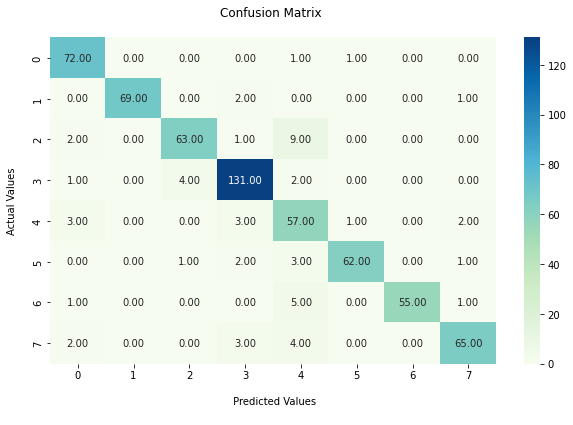

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        74
           1       1.00      0.96      0.98        72
           2       0.93      0.84      0.88        75
           3       0.92      0.95      0.94       138
           4       0.70      0.86      0.78        66
           5       0.97      0.90      0.93        69
           6       1.00      0.89      0.94        62
           7       0.93      0.88      0.90        74

    accuracy                           0.91       630
   macro avg       0.92      0.91      0.91       630
weighted avg       0.92      0.91      0.91       630



In [ ]:
svmOVO = SVC(decision_function_shape='ovo')
svmOVO.fit(X_train,multi_train_labels)
Y_pred = svmOVO.predict(X_test)

# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=svmOVO.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(svmOVO.classes_)
fx.yaxis.set_ticklabels(svmOVO.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

Merged Labels: One vs. Rest

merging soccer and football

In [ ]:
# mapping data to label
def label_data(x):
  label_map = {
      "chess":0,
      "cricket":1,
      "hockey":2,
      "soccer":3,
      "football":3,
      "%22forest%20fire%22":4, 
      "flood":5, 
      "earthquake":6,
      "drought":7
  }
  return label_map[x]

multi_train_labels = train.leaf_label.apply(label_data)
multi_test_labels = test.leaf_label.apply(label_data)

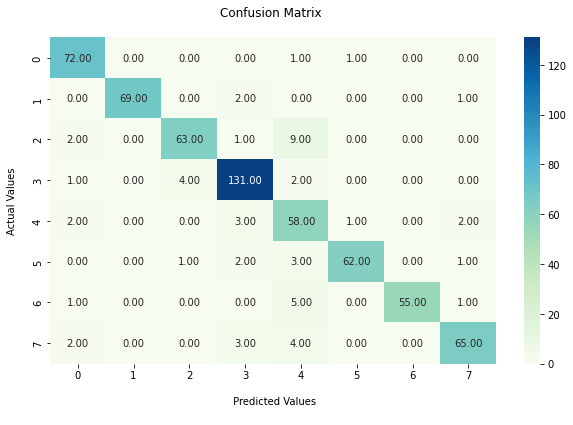

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        74
           1       1.00      0.96      0.98        72
           2       0.93      0.84      0.88        75
           3       0.92      0.95      0.94       138
           4       0.71      0.88      0.78        66
           5       0.97      0.90      0.93        69
           6       1.00      0.89      0.94        62
           7       0.93      0.88      0.90        74

    accuracy                           0.91       630
   macro avg       0.92      0.91      0.91       630
weighted avg       0.92      0.91      0.91       630



In [ ]:
svmOVR = SVC(decision_function_shape='ovr', break_ties=True)
svmOVR.fit(X_train,multi_train_labels)
Y_pred = svmOVR.predict(X_test)

# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=svmOVR.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(svmOVR.classes_)
fx.yaxis.set_ticklabels(svmOVR.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

Fix class imbalance: One vs. One

Counter({3: 562, 6: 288, 4: 284, 5: 281, 1: 278, 7: 276, 0: 276, 2: 275})
Counter({0: 275, 1: 275, 2: 275, 3: 275, 4: 275, 5: 275, 6: 275, 7: 275})


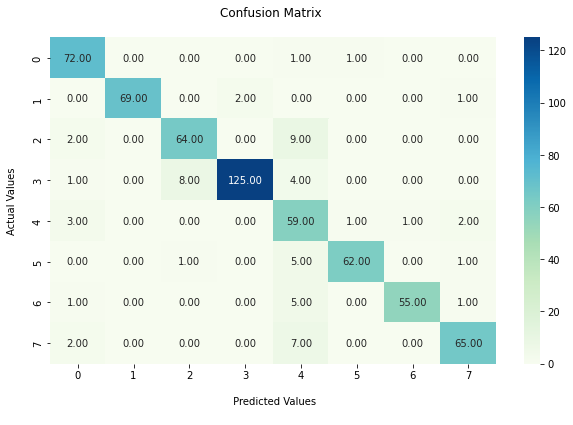

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        74
           1       1.00      0.96      0.98        72
           2       0.88      0.85      0.86        75
           3       0.98      0.91      0.94       138
           4       0.66      0.89      0.76        66
           5       0.97      0.90      0.93        69
           6       0.98      0.89      0.93        62
           7       0.93      0.88      0.90        74

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.90       630
weighted avg       0.92      0.91      0.91       630



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import collections

# mapping data to label
def label_data(x):
  label_map = {
      "chess":0,
      "cricket":1,
      "hockey":2,
      "soccer":3,
      "football":3,
      "%22forest%20fire%22":4, 
      "flood":5, 
      "earthquake":6,
      "drought":7
  }
  return label_map[x]

multi_train_labels = train.leaf_label.apply(label_data)
multi_test_labels = test.leaf_label.apply(label_data)

# Balancing
counts = collections.Counter(multi_train_labels)
print(counts)
sampler = RandomUnderSampler()
X_balanced, Y_balanced = sampler.fit_resample(X_train, multi_train_labels)
balanced_counts = collections.Counter(Y_balanced)
print(balanced_counts)

# training
svmOVO = SVC(decision_function_shape='ovo')
svmOVO.fit(X_balanced,Y_balanced)
Y_pred = svmOVO.predict(X_test)

# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=svmOVO.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(svmOVO.classes_)
fx.yaxis.set_ticklabels(svmOVO.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

Fix class imbalance: One vs. Rest

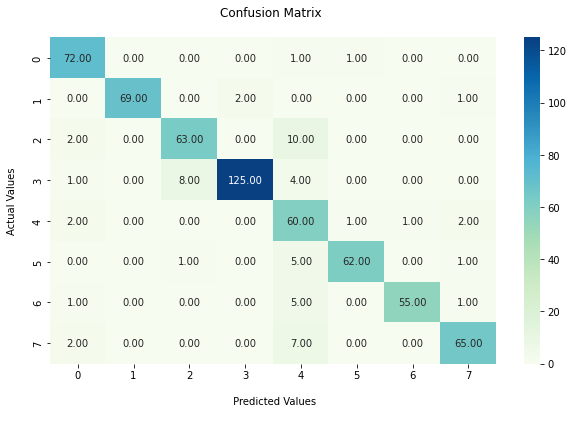

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        74
           1       1.00      0.96      0.98        72
           2       0.88      0.84      0.86        75
           3       0.98      0.91      0.94       138
           4       0.65      0.91      0.76        66
           5       0.97      0.90      0.93        69
           6       0.98      0.89      0.93        62
           7       0.93      0.88      0.90        74

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.92      0.91      0.91       630



In [ ]:
svmOVR = SVC(decision_function_shape='ovr', break_ties=True)
svmOVR.fit(X_balanced,Y_balanced)
Y_pred = svmOVR.predict(X_test)

# confusion matrix
cm = confusion_matrix(multi_test_labels,Y_pred,labels=svmOVR.classes_)
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(multi_test_labels,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(svmOVR.classes_)
fx.yaxis.set_ticklabels(svmOVR.classes_)
plt.show()

# Classification report
print(classification_report(multi_test_labels,Y_pred))

# **Word Embedding**

## **Question 10**

## **Question 11**

Feature engineering process:

Test just "keywords" column as the features


(1) extract keywords

(2) no need for preprocessing (i.e. cleaning, removal of punctuation and numbers)

(3) GLoVE embed the words

(4) aggregate words into a single vector using normalization (averaging across the vectors)

### Test just "keywords" as features

In [ ]:
df["keywords"]

0       ['acquire', 'agrees', 'nevada', 'retail', 'hoc...
1       ['sexual', 'exclusive', 'settlement', 'million...
2       ['québec', 'surprise', 'trust', 'sexual', 'org...
3       ['sexual', 'organization', 'million', 'ceo', '...
4       ['beats', 'force', 'season', 'teams', 'anchora...
                              ...                        
3145    ['coal', 'traffic', 'right', 'mississippi', 's...
3146    ['manufacturing', 'system', 'future', 'technol...
3147    ['developers', 'live', 'state', 'development',...
3148    ['rohingyas', 'told', 'indonesia', 'refugees',...
3149    ['outlook', 'low', 'efforts', 'normal', 'level...
Name: keywords, Length: 3150, dtype: object

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-01-26 22:48:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-26 22:48:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-26 22:48:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
train, test = train_test_split(df[["keywords", "root_label"]], test_size=0.2)

In [ ]:
train

,keywords,root_label
922,"['soccer', 'wife', 'admits', 'statement', 'beh...",sports
1392,"['drake', 'football', '3rd', 'ravens', 'saints...",sports
1863,"['lungs', 'health', 'pm25', 'disease', 'pollut...",climate
1029,"['soccer', 'princess', 'core', 'prince', 'will...",sports
2846,"['dataand', 'drought', 'state', 'conditions', ...",climate
...,...,...
859,"['season', 'game', 'football', 'series', 'coll...",sports
181,"['season', 'preview', 'second', 'voice', 'podc...",sports
738,"['teams', 'football', 'carolina', 'predictions...",sports
3127,"['plant', 'release', 'district', 'reserves', '...",climate


In [ ]:
Y_train = train["root_label"]
Y_test = test["root_label"]

In [ ]:
import numpy as np
import re

In [ ]:
embeddings_dict={}
with open("glove.6B.300d.txt", 'r') as f:
  for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector

In [ ]:
def get_glove(row):
  vec = None
  count = 0
  for word in row:
    if count==0 and word in embeddings_dict:
      vec = embeddings_dict[word]
      count = count+1
    elif word in embeddings_dict:
      vec = vec + embeddings_dict[word]
      count = count+1
  return vec/count # averaging

In [ ]:
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

def cleanKeywords(row):
  return remove_punctuation(row['keywords']) # remove punctuation

In [ ]:
train['keywords']=train.apply(cleanKeywords, axis=1)
test['keywords']=test.apply(cleanKeywords, axis=1)

In [ ]:
train

,keywords,root_label
922,soccer wife admits statement behaviour coach u...,sports
1392,drake football 3rd ravens saints game win balt...,sports
1863,lungs health pm25 disease pollutants research ...,climate
1029,soccer princess core prince william kate littl...,sports
2846,dataand drought state conditions climate using...,climate
...,...,...
859,season game football series college win et cup...,sports
181,season preview second voice podcast matt bruce...,sports
738,teams football carolina predictions lines pick...,sports
3127,plant release district reserves waterworks shu...,climate


In [ ]:
vectorized_train_X = train['keywords'].apply(get_glove).to_numpy() #GLoVE embeddings
vectorized_test_X = test['keywords'].apply(get_glove).to_numpy()

In [ ]:
vectorized_train_X[0].shape

(300,)

In [ ]:
vectorized_train_X = np.stack(vectorized_train_X, axis=0)
vectorized_test_X = np.stack(vectorized_test_X,axis=0)

In [ ]:
vectorized_train_X.shape

(2520, 300)

In [ ]:
vectorized_test_X.shape

(630, 300)

Training classifier with GLoVE-based feature

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


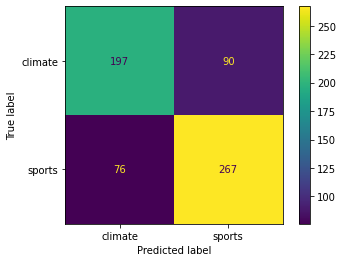

              precision    recall  f1-score   support

     climate       0.72      0.69      0.70       287
      sports       0.75      0.78      0.76       343

    accuracy                           0.74       630
   macro avg       0.73      0.73      0.73       630
weighted avg       0.74      0.74      0.74       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


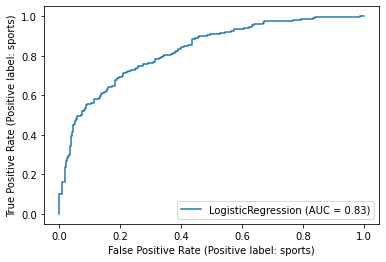

In [ ]:
from sklearn.linear_model import LogisticRegression

logNoReg = LogisticRegression(penalty = 'none')
logNoReg.fit(vectorized_train_X, Y_train)
Y_pred = logNoReg.predict(vectorized_test_X)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=logNoReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logNoReg.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(logNoReg, vectorized_test_X, Y_test)
plt.show()

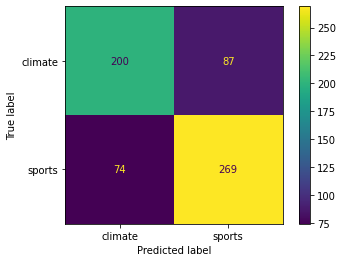

              precision    recall  f1-score   support

     climate       0.73      0.70      0.71       287
      sports       0.76      0.78      0.77       343

    accuracy                           0.74       630
   macro avg       0.74      0.74      0.74       630
weighted avg       0.74      0.74      0.74       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


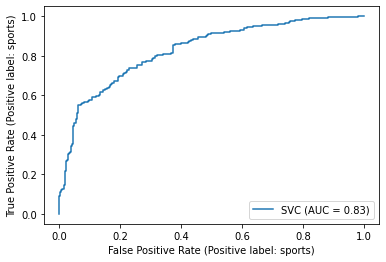

In [ ]:
from sklearn import svm

# C = 1000
hardMargin = svm.SVC(kernel='linear', C=1000)
hardMargin.fit(vectorized_train_X, Y_train)
Y_pred = hardMargin.predict(vectorized_test_X)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=hardMargin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hardMargin.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(hardMargin, vectorized_test_X, Y_test)
plt.show()

In [ ]:
# 5-fold cross validation {10^k| -3<=k<=6, k in Z}
# perform on TRAINING data, not test set
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable

gamma = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 500, 1000]

hyperparameter_score_list = []
for k in gamma: 
  print(k)
  cf = svm.SVC(kernel='linear', C=k)
  scores = cross_validate(cf, vectorized_train_X, Y_train, cv=5, scoring='accuracy')
  average_score = np.mean(scores['test_score'])
  hyperparameter_score_list.append([k, average_score])

paramTable = PrettyTable(["gamma", "average accuracy"])
for row in hyperparameter_score_list:
  paramTable.add_row([row[0], row[1]])
print (paramTable)

0.001
0.005
0.01
0.05
0.1
0.5
1
10
100
500
1000
+-------+--------------------+
| gamma |  average accuracy  |
+-------+--------------------+
| 0.001 | 0.5583333333333333 |
| 0.005 | 0.5583333333333333 |
|  0.01 | 0.5583333333333333 |
|  0.05 | 0.7043650793650794 |
|  0.1  | 0.7202380952380953 |
|  0.5  | 0.7353174603174604 |
|   1   | 0.7376984126984127 |
|   10  | 0.7412698412698413 |
|  100  | 0.7492063492063492 |
|  500  | 0.7507936507936508 |
|  1000 | 0.755952380952381  |
+-------+--------------------+


In [ ]:
# 5-fold cross validation {10^k| -5<=k<=5, k in Z}
# perform on TRAINING data, not test set

regularization = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

hyperparameter_score_list = []
for strength in regularization: 
  print(strength)
  cf = LogisticRegression(penalty = 'l1', solver='liblinear', C=strength) #C is inverse to regularization strength
  scores = cross_validate(cf, vectorized_train_X, Y_train, cv=5, scoring='accuracy')
  average_score = np.mean(scores['test_score'])
  hyperparameter_score_list.append([strength, average_score])

paramTable = PrettyTable(["Regularization Strength", "average accuracy"])
for row in hyperparameter_score_list:
  paramTable.add_row([row[0], row[1]])
print (paramTable)

0.0001
0.001
0.01
0.1
1
10
100
1000
10000
+-------------------------+--------------------+
| Regularization Strength |  average accuracy  |
+-------------------------+--------------------+
|          0.0001         | 0.4416666666666666 |
|          0.001          | 0.4416666666666666 |
|           0.01          | 0.5583333333333333 |
|           0.1           | 0.651984126984127  |
|            1            | 0.734920634920635  |
|            10           | 0.7404761904761905 |
|           100           | 0.7523809523809524 |
|           1000          | 0.7535714285714286 |
|          10000          | 0.7535714285714286 |
+-------------------------+--------------------+


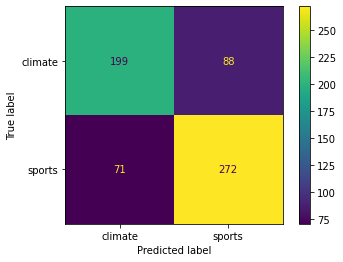

              precision    recall  f1-score   support

     climate       0.74      0.69      0.71       287
      sports       0.76      0.79      0.77       343

    accuracy                           0.75       630
   macro avg       0.75      0.74      0.74       630
weighted avg       0.75      0.75      0.75       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


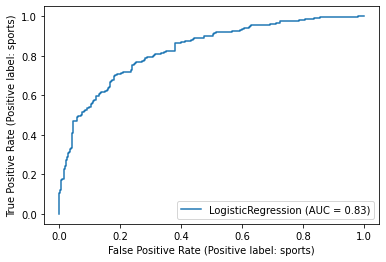

In [ ]:
from sklearn.linear_model import LogisticRegression

logL1 = LogisticRegression(penalty = 'l1', solver='liblinear', C=100)
logL1.fit(vectorized_train_X, Y_train)
Y_pred = logL1.predict(vectorized_test_X)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=logL1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logL1.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(logL1, vectorized_test_X, Y_test)
plt.show()

###Testing with full_text

In [ ]:
train, test = train_test_split(df[["full_text", "root_label"]], test_size=0.2)

In [ ]:
Y_train = train["root_label"]
Y_test = test["root_label"]

In [ ]:
def cleanDF(row):
  return clean(row['full_text'])

train['full_text'] = train.apply(cleanDF, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(cleanDF, axis=1) 

In [ ]:
## cleaning
train['full_text'] = train.apply(doLemmatization, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(doLemmatization, axis=1) 

In [ ]:
train['full_text']

1219    FILE United States head coach Gregg Berhalter ...
1430    The bizarre chess cheat drama surround world c...
2059    Over the past century forest across the wester...
3054    A woman water her garden in Los Angeles in Aug...
2662    This morning at around AM a magnitude earthqua...
                              ...                        
370     Culture Former Pakistan cricketer and Presiden...
549     Its be less than a week since it be report tha...
816     One of NZ football great Maia Jackman hop she ...
340     Editors Note This be a roundup of this week mo...
576     By Pawan Atri min read India bat great Virat K...
Name: full_text, Length: 2520, dtype: object

In [ ]:
embeddings_dict={}
with open("glove.6B.300d.txt", 'r') as f:
  for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector

In [ ]:
def get_glove_text(row):
  vec = None
  count = 0
  for word in row.split():
    if count==0 and word in embeddings_dict:
      vec = embeddings_dict[word]
      count = count+1
    elif word in embeddings_dict:
      vec = vec + embeddings_dict[word]
      count = count+1
  return vec/count # averaging

In [ ]:
vectorized_train_X = train['full_text'].apply(get_glove_text).to_numpy() #GLoVE embeddings
vectorized_test_X = test['full_text'].apply(get_glove_text).to_numpy()

In [ ]:
vectorized_train_X.shape

(2520,)

In [ ]:
vectorized_train_X = np.stack(vectorized_train_X, axis=0)
vectorized_test_X = np.stack(vectorized_test_X,axis=0)

In [ ]:
vectorized_train_X.shape

(2520, 300)

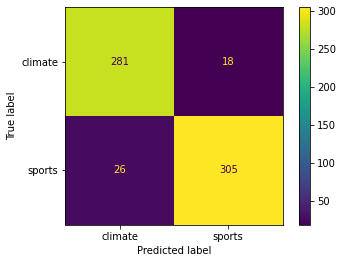

              precision    recall  f1-score   support

     climate       0.92      0.94      0.93       299
      sports       0.94      0.92      0.93       331

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


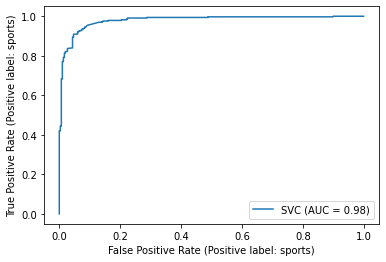

In [ ]:
from sklearn import svm

# C = 1000
hardMargin = svm.SVC(kernel='linear', C=1000)
hardMargin.fit(vectorized_train_X, Y_train)
Y_pred = hardMargin.predict(vectorized_test_X)

# confusion matrix
cm = confusion_matrix(Y_test,Y_pred,labels=hardMargin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hardMargin.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(Y_test,Y_pred))

# ROC Curve
metrics.plot_roc_curve(hardMargin, vectorized_test_X, Y_test)
plt.show()

## **Question 12**

In [ ]:
train, test = train_test_split(df[["full_text", "root_label"]], test_size=0.2)

In [ ]:
Y_train = train["root_label"]
Y_test = test["root_label"]

In [ ]:
def cleanDF(row):
  return clean(row['full_text'])

train['full_text'] = train.apply(cleanDF, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(cleanDF, axis=1) 

In [ ]:
## lemmatization
train['full_text'] = train.apply(doLemmatization, axis=1) # axis=1 iterates row by row
test['full_text'] = test.apply(doLemmatization, axis=1) 

In [ ]:
def get_glove_text(row):
  vec = None
  count = 0
  for word in row.split():
    if count==0 and word in embeddings_dict:
      vec = embeddings_dict[word]
      count = count+1
    elif word in embeddings_dict:
      vec = vec + embeddings_dict[word]
      count = count+1
  return vec/count # averaging

In [ ]:
from sklearn.metrics import accuracy_score
fnames = ["glove.6B.50d.txt", "glove.6B.100d.txt", "glove.6B.200d.txt", "glove.6B.300d.txt"]

accuracies = []
for fname in fnames:
  with open(fname, 'r') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector
  
  print(fname)
  
  vectorized_train_X = train['full_text'].apply(get_glove_text).to_numpy() #GLoVE embeddings
  vectorized_test_X = test['full_text'].apply(get_glove_text).to_numpy()
  print(vectorized_train_X.shape)

  vectorized_train_X = np.stack(vectorized_train_X, axis=0)
  vectorized_test_X = np.stack(vectorized_test_X,axis=0)
  print(vectorized_train_X.shape)

  hardMargin = svm.SVC(kernel='linear', C=1000)
  hardMargin.fit(vectorized_train_X, Y_train)
  Y_pred = hardMargin.predict(vectorized_test_X)

  accuracy = accuracy_score(Y_test, Y_pred)
  accuracies.append(accuracy) 
  print(accuracy) 
  

glove.6B.50d.txt
(2520,)
(2520, 50)
0.9396825396825397
glove.6B.100d.txt
(2520,)
(2520, 100)
0.9412698412698413
glove.6B.200d.txt
(2520,)
(2520, 200)
0.9317460317460318
glove.6B.300d.txt
(2520,)
(2520, 300)
0.9396825396825397


Text(0.5, 1.0, 'Accuracy vs. Number of GLoVE Dimensionvs')

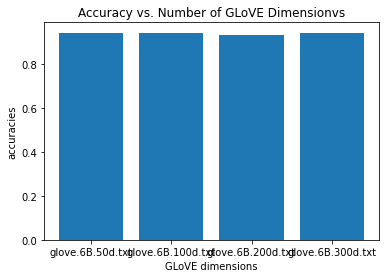

In [ ]:
import matplotlib.pyplot as plt
plt.bar(fnames, accuracies)
plt.ylabel ('accuracies')
plt.xlabel ('GLoVE dimensions')
plt.title ("Accuracy vs. Number of GLoVE Dimensionvs")

## **Question 13**

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=24dca4c2aca88f7898a01e9b88c805ac8e4d82d28bd1529be1e3dd99254312e7
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=f82d17450011f1f963ae9d9fc1cb445ca2babc2a099b89e90977f606cc8e14c1
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(vectorized_train_X) # dimension of 300
print(embedding.shape)

(2520, 2)


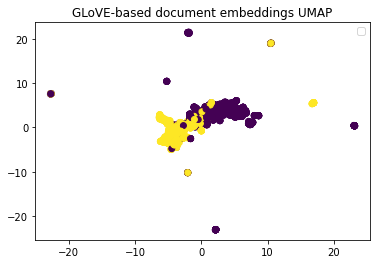

In [ ]:
arr = Y_train.to_numpy()
colors=[]
for pt in arr:
  if pt == "sports":
    colors.append(0)
  else:
    colors.append(1)
  
plt.scatter(embedding[:,0], embedding[:,1], c = colors)
plt.title("GLoVE-based document embeddings UMAP")
plt.legend()

Normal random vectors

In [ ]:
randVec = np.random.normal(size = (2520, 2))

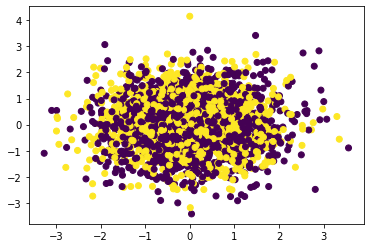

In [ ]:
plt.scatter(randVec[:,0], randVec[:,1], c = colors)